## Setup

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
plt.rcParams["figure.figsize"] = (15, 15)

In [6]:
PICTURES_FOLDER = '/content/drive/MyDrive/Bundesliga/RandomPicsForTest/'
pictures = ['Screenshot 2022-11-05 at 19.24.51.png',
            'Screenshot 2022-11-05 at 19.25.02.png']

In [27]:
path1 = PICTURES_FOLDER + pictures[0]
pic1 = cv.imread(path1)
pic1 = cv.cvtColor(pic1, cv.COLOR_BGR2RGB)

### Original image

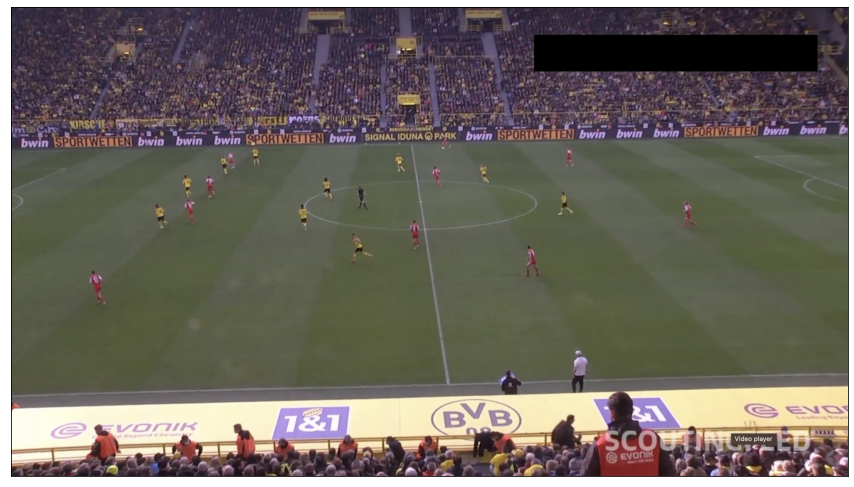

In [40]:
plt.imshow(pic1)
plt.xticks([])
plt.yticks([])
plt.show()

### Sobel

In [41]:
sobelx = cv.Sobel(pic1, cv.CV_64F, 1, 0)
sobely = cv.Sobel(pic1, cv.CV_64F, 0, 1)
sobel_mag = np.sqrt(sobelx ** 2 + sobely ** 2).astype('uint8')

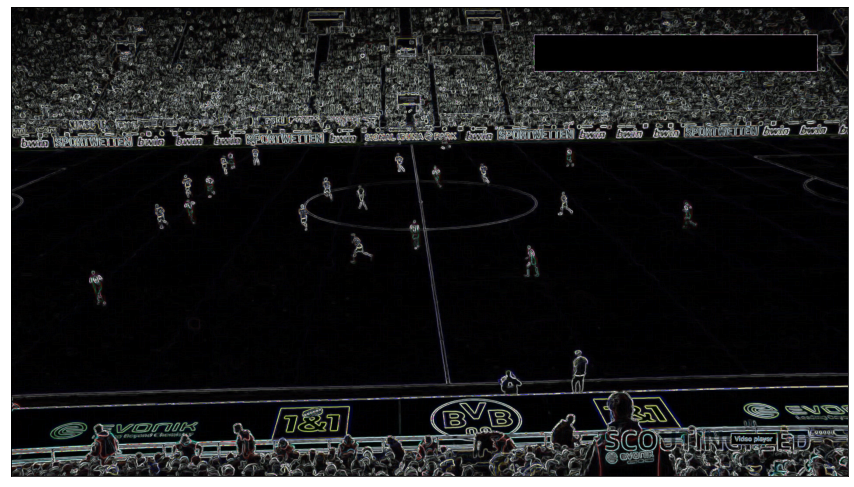

In [42]:
# eqsobel = cv.equalizeHist(sobel_mag)
plt.imshow(sobel_mag, cmap='gray') # sobel_mag or eqsobel
plt.xticks([])
plt.yticks([])
plt.show()

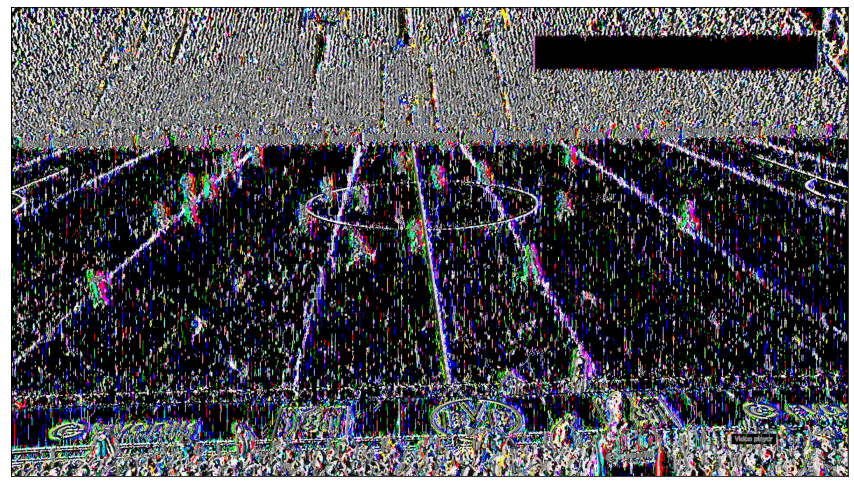

In [43]:
plt.imshow(sobelx.astype('uint8'), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

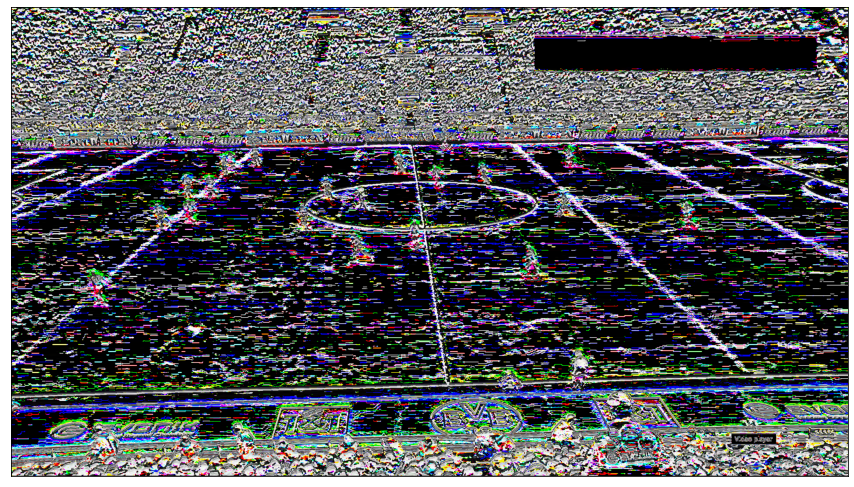

In [44]:
plt.imshow(sobely.astype('uint8'), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

### Laplacian of Gaussian

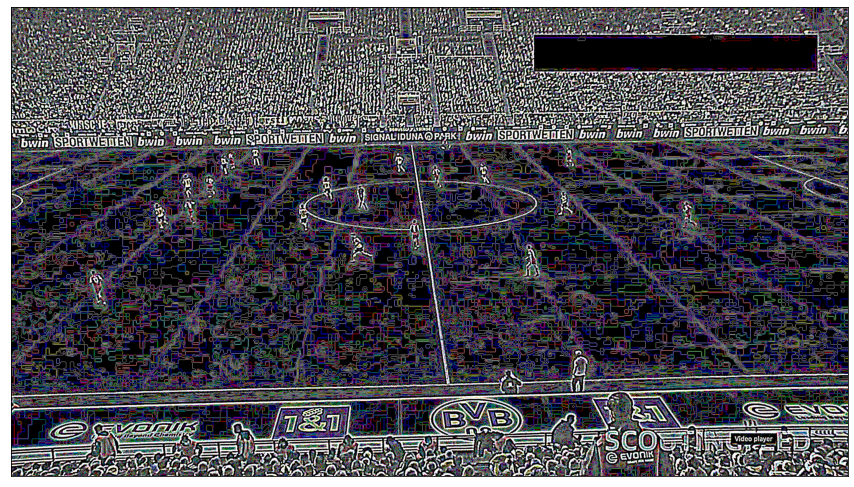

In [45]:
gblur = cv.GaussianBlur(pic1, (9, 9), 0)
log = cv.Laplacian(gblur, cv.CV_64F).astype('uint8')
# eqlog = cv.equalizeHist(log)
plt.imshow(log, cmap='gray') # log or eqlog
plt.xticks([])
plt.yticks([])
plt.show()

### Canny edge

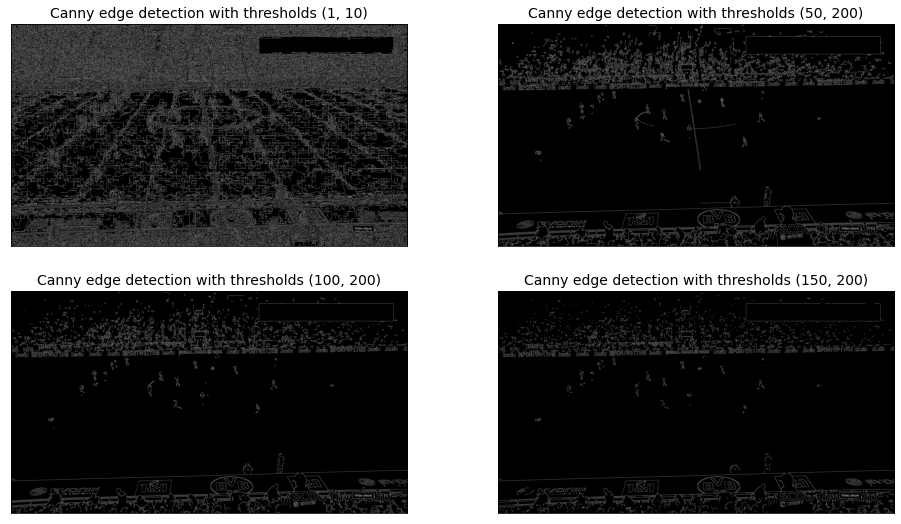

In [46]:
thresholds = ((1, 10), (50, 200), (100, 200), (150, 200))
plt.figure(figsize=(16, 9))
for i, threshold in enumerate(thresholds):
    canny_img = cv.Canny(pic1, threshold[0], threshold[1])
    plt.subplot(2, 2, i + 1)
    plt.imshow(canny_img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Canny edge detection with thresholds {threshold}', size=14)

### Binary image

I don't think binary is a good choice given that the right threshold (if there was) would change in every frame and we wouldn't be able to keep it constant.

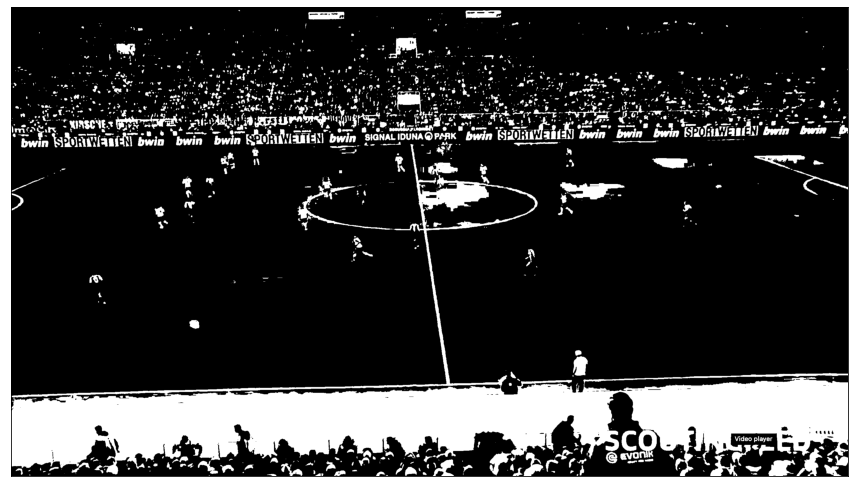

In [59]:
pic1_gray = cv.imread(path1, 0)
bw = cv.threshold(pic1_gray, 100, 255, cv.THRESH_BINARY)[1]
plt.imshow(bw, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()